In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# DATASET  : "TOP INSTAGRAM INFLUENCERS DATA"

AIM: Analysis of top 200 instagram Influencers by the number of quality and engaged followers This project 
     is all about finding the top Instagram accounts in any country and industry to make the most of your marketing campaigns.
     Also review the top influencers' characteristics in terms of followers, audience country, authentic engagement,
     and engagement average.

In [2]:
df=pd.read_csv('top_insta_influencers_data.csv')
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [3]:
df.columns

Index(['rank', 'channel_info', 'influence_score', 'posts', 'followers',
       'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes',
       'country'],
      dtype='object')

                    UNDERSTANDING OF DATASET

Name of Columns:                                       Information of columns:

1]rank                                           Rank of the Influencer on basis of number of followers they have.
                                            
2]channel_info                                   Username of the Instagrammer.
                                                 
3]influence_score	                             Influence score of the users.

4]posts                                          Number of posts they have made so far.

5]followers                                      Number of followers of the user.

6]avg_likes                                      Average likes on instagrammer posts.                                   

7]60_day_eng_rate                                Last 60 days engagement rate of instagrammer as faction of 
                                                 engagements they have done so far.

8]new_post_avg_like                              Average likes they have on new posts.

9]total_likes                                    Total likes the user has got on their posts. (in Billion).

10]country                                       Country or region of origin of the user.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


*In my dataframe total 10 columns are present.

*total 200 records(rows) are present.

*In my dataframe only in "country" column null values are present.

*All other columns are having zero null values.

In [5]:
df.shape

(200, 10)

# CLEANING OF DATASET

In [6]:
df.isnull().sum()

rank                  0
channel_info          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       0
new_post_avg_like     0
total_likes           0
country              62
dtype: int64

In [7]:
df['posts'].value_counts()

10.0k    13
1.2k      8
1.8k      6
2.3k      6
2.0k      5
         ..
10.3k     1
0.60k     1
0.06k     1
0.17k     1
0.77k     1
Name: posts, Length: 99, dtype: int64

In [8]:
def clean_size(x):
    if 'k' in x:
        x=x.replace('k','')
        return float(x)/1024   #converted into MB
    elif 'm' in x:
        x=x.replace('m','')
        return float(x)
    elif 'b' in x:
        x=x.replace('b','')
        return float(x)
    else:
        return float(x)

In [9]:
df['posts']=df['posts'].map(clean_size)          #mapping
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               200 non-null    int64  
 1   channel_info       200 non-null    object 
 2   influence_score    200 non-null    int64  
 3   posts              200 non-null    float64
 4   followers          200 non-null    object 
 5   avg_likes          200 non-null    object 
 6   60_day_eng_rate    200 non-null    object 
 7   new_post_avg_like  200 non-null    object 
 8   total_likes        200 non-null    object 
 9   country            138 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


In [10]:
df['followers']=df['followers'].map(clean_size)

In [11]:
df['avg_likes']=df['avg_likes'].map(clean_size)

In [12]:
df['new_post_avg_like']=df['new_post_avg_like'].map(clean_size)

In [13]:
df['total_likes']=df['total_likes'].map(clean_size)

In [14]:
df['60_day_eng_rate']=df['60_day_eng_rate'].str.replace('%','')

In [15]:
df['60_day_eng_rate']=df['60_day_eng_rate'].astype('float64')

In [16]:
df['60_day_eng_rate'].value_counts()

0.02    5
0.41    4
0.57    4
0.44    3
0.20    3
       ..
1.15    1
1.12    1
9.43    1
2.19    1
1.42    1
Name: 60_day_eng_rate, Length: 146, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               200 non-null    int64  
 1   channel_info       200 non-null    object 
 2   influence_score    200 non-null    int64  
 3   posts              200 non-null    float64
 4   followers          200 non-null    float64
 5   avg_likes          200 non-null    float64
 6   60_day_eng_rate    199 non-null    float64
 7   new_post_avg_like  200 non-null    float64
 8   total_likes        200 non-null    float64
 9   country            138 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 15.8+ KB


In [18]:
df

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,0.003223,475.8,8.700000,1.39,6.500000,29.0,Spain
1,2,kyliejenner,91,0.006738,366.2,8.300000,1.62,5.900000,57.4,United States
2,3,leomessi,90,0.000869,357.3,6.800000,1.24,4.400000,6.0,NaN
3,4,selenagomez,93,0.001758,342.7,6.200000,0.97,3.300000,11.5,United States
4,5,therock,91,0.006641,334.1,1.900000,0.20,0.649707,12.5,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,0.002246,33.2,0.609180,1.40,0.453809,1.4,United States
196,197,nancyajram,81,0.003711,33.2,0.381250,0.64,0.203125,1.5,France
197,198,luansantana,79,0.000752,33.2,0.188770,0.26,0.080664,149.2,Brazil
198,199,nickjonas,78,0.002246,33.0,0.702734,1.42,0.456738,1.7,United States


In [19]:
df.drop(['rank'],axis=1,inplace=True)            #drop the rank col which is not imp

In [20]:
df.describe()

,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
count,200.000000,200.000000,200.00000,200.000000,199.000000,200.000000,200.000000
mean,81.820000,0.003418,77.40950,1.781933,1.902010,1.202598,142.132000
std,8.878159,0.003394,73.68727,2.196127,3.329719,1.860260,276.127439
min,22.000000,0.000010,32.80000,0.063574,0.010000,0.000000,1.000000
25%,80.000000,0.000925,40.00000,0.492578,0.410000,0.191162,2.000000
50%,84.000000,0.002051,50.05000,1.100000,0.880000,0.519678,4.000000
75%,86.000000,0.004907,68.90000,2.100000,2.035000,1.325000,20.750000
max,93.000000,0.017090,475.80000,15.400000,26.410000,12.600000,987.400000


In [21]:
df

,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,cristiano,92,0.003223,475.8,8.700000,1.39,6.500000,29.0,Spain
1,kyliejenner,91,0.006738,366.2,8.300000,1.62,5.900000,57.4,United States
2,leomessi,90,0.000869,357.3,6.800000,1.24,4.400000,6.0,NaN
3,selenagomez,93,0.001758,342.7,6.200000,0.97,3.300000,11.5,United States
4,therock,91,0.006641,334.1,1.900000,0.20,0.649707,12.5,United States
...,...,...,...,...,...,...,...,...,...
195,iambeckyg,71,0.002246,33.2,0.609180,1.40,0.453809,1.4,United States
196,nancyajram,81,0.003711,33.2,0.381250,0.64,0.203125,1.5,France
197,luansantana,79,0.000752,33.2,0.188770,0.26,0.080664,149.2,Brazil
198,nickjonas,78,0.002246,33.0,0.702734,1.42,0.456738,1.7,United States


In [22]:
df=df.astype({'followers':'int','total_likes':'int'})                  #convert the float value into integer

In [23]:
df

,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,cristiano,92,0.003223,475,8.700000,1.39,6.500000,29,Spain
1,kyliejenner,91,0.006738,366,8.300000,1.62,5.900000,57,United States
2,leomessi,90,0.000869,357,6.800000,1.24,4.400000,6,NaN
3,selenagomez,93,0.001758,342,6.200000,0.97,3.300000,11,United States
4,therock,91,0.006641,334,1.900000,0.20,0.649707,12,United States
...,...,...,...,...,...,...,...,...,...
195,iambeckyg,71,0.002246,33,0.609180,1.40,0.453809,1,United States
196,nancyajram,81,0.003711,33,0.381250,0.64,0.203125,1,France
197,luansantana,79,0.000752,33,0.188770,0.26,0.080664,149,Brazil
198,nickjonas,78,0.002246,33,0.702734,1.42,0.456738,1,United States


In [48]:
df.corr()       #

,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
influence_score,1.000000,0.160068,0.368027,0.051668,-0.081891,0.036672,-0.025796
posts,0.160068,1.000000,0.060707,-0.343309,-0.324068,-0.289548,-0.236325
followers,0.368027,0.060707,1.000000,0.349069,-0.101308,0.300494,-0.200071
avg_likes,0.051668,-0.343309,0.349069,1.000000,0.754476,0.846064,0.017679
60_day_eng_rate,-0.081891,-0.324068,-0.101308,0.754476,1.000000,0.868990,0.108733
new_post_avg_like,0.036672,-0.289548,0.300494,0.846064,0.868990,1.000000,-0.004184
total_likes,-0.025796,-0.236325,-0.200071,0.017679,0.108733,-0.004184,1.000000


# ANALYSIS OF DATASET

# 1]who has maximum followers on instagram data and the score of influencer of that channel info

In [24]:
top_followers=df[['channel_info','influence_score','followers']].loc[df['followers']==df['followers'].max()]
top_followers

,channel_info,influence_score,followers
0,cristiano,92,475


<Figure size 700x700 with 0 Axes>

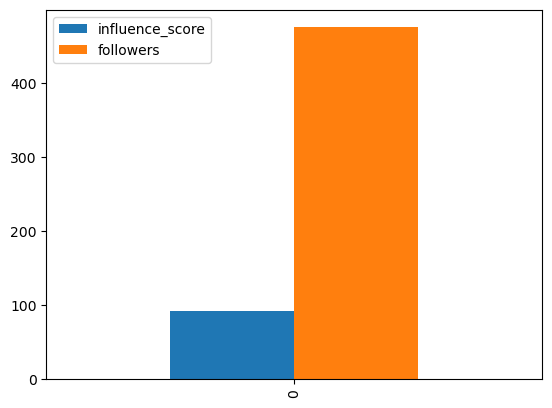

In [25]:
plt.figure(figsize=(7,7))
top_followers.plot.bar()
plt.show()

above shows that the influencer_score is 92 and followers is 475 of most followers of channel_info 

# 2]who having the maximum no of post

In [26]:
post=df['posts'].max()
max_post=df[['channel_info','posts']].loc[df['posts']==post]
max_post

,channel_info,posts
62,raffinagita1717,0.01709


<AxesSubplot:>

<Figure size 700x700 with 0 Axes>

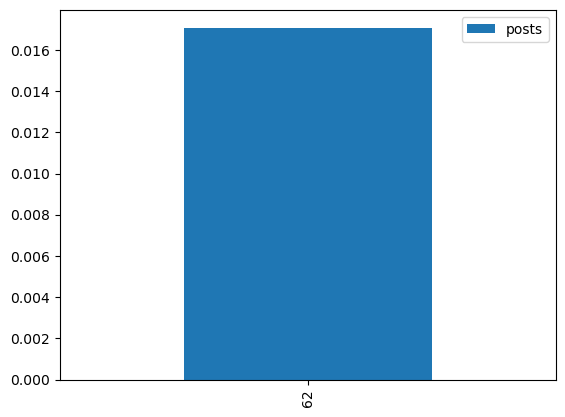

In [27]:
plt.figure(figsize=(7,7))
max_post.plot.bar()

above shows that the who having maximum post 

# 3]creating a new data frame just whose is the only from united states

In [28]:
state=df[df['country']=='United States']
state

,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
1,kyliejenner,91,0.006738,366,8.300000,1.62,5.900000,57,United States
3,selenagomez,93,0.001758,342,6.200000,0.97,3.300000,11,United States
4,therock,91,0.006641,334,1.900000,0.20,0.649707,12,United States
5,kimkardashian,91,0.005469,329,3.500000,0.88,2.900000,19,United States
6,arianagrande,92,0.004883,327,3.700000,1.20,3.900000,18,United States
...,...,...,...,...,...,...,...,...,...
186,blakelively,80,0.000107,34,3.100000,0.02,0.000000,350,United States
188,disney,77,0.007129,34,0.180859,0.44,0.128906,1,United States
189,shaymitchell,83,0.006152,34,0.715234,0.73,0.241699,4,United States
195,iambeckyg,71,0.002246,33,0.609180,1.40,0.453809,1,United States


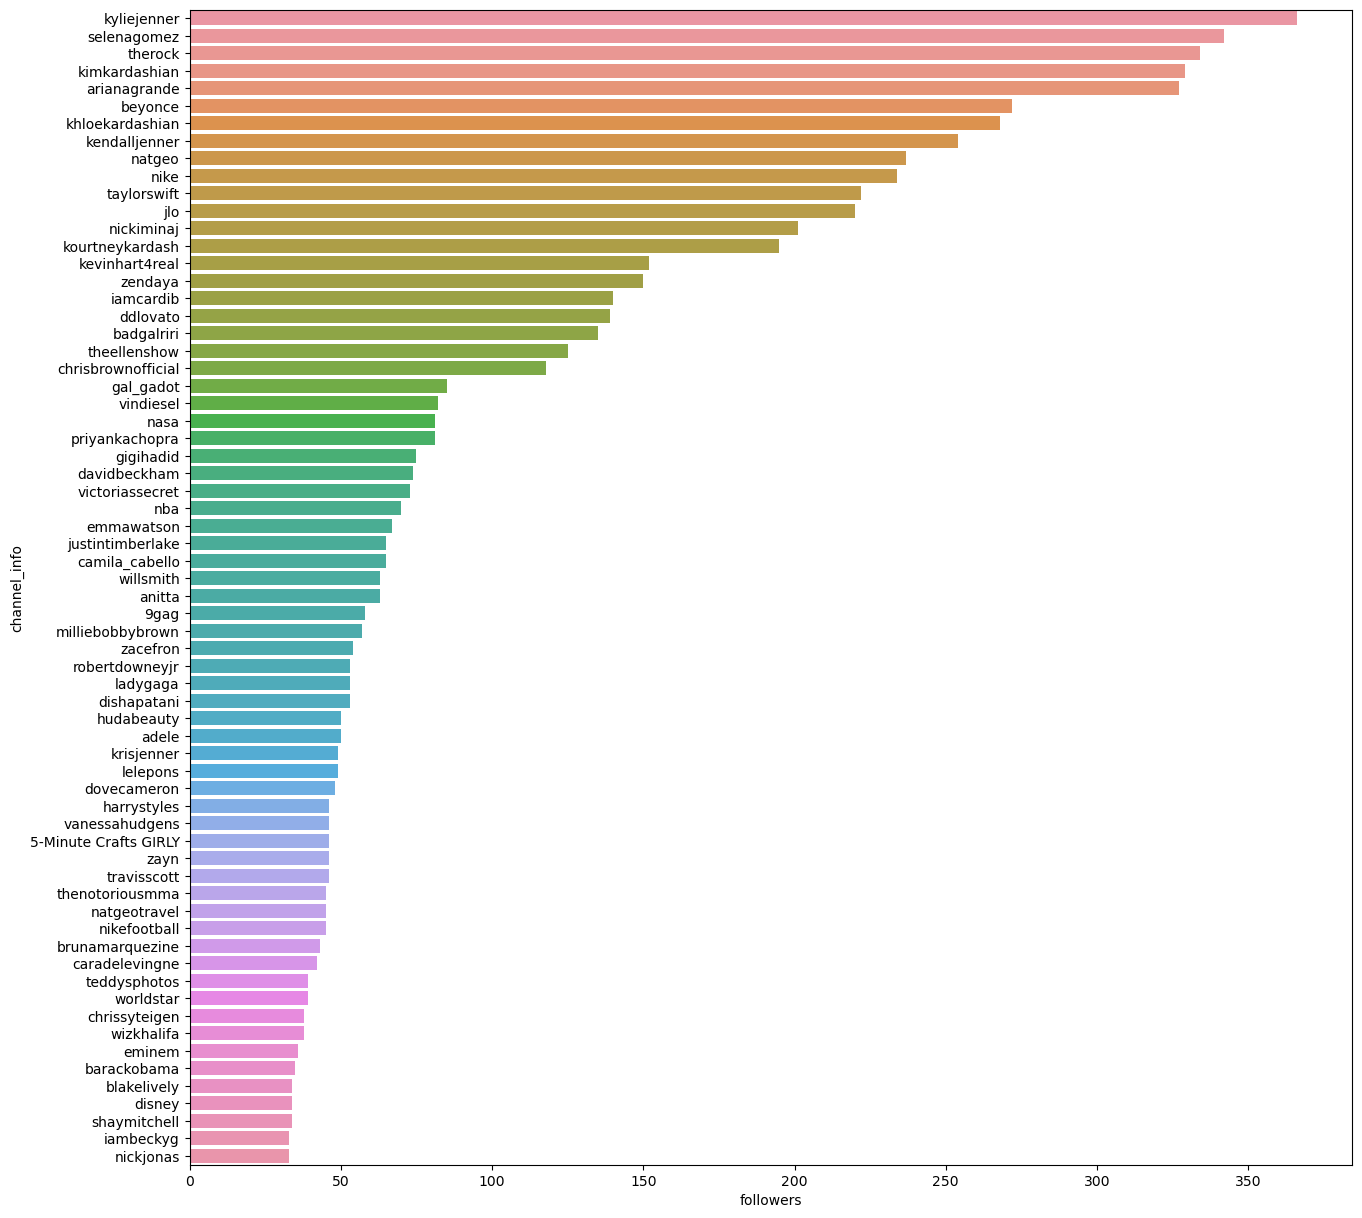

In [29]:
plt.figure(figsize=(15,15))
sns.barplot(y='channel_info',x='followers',data=state)
plt.show()

above graph shows that the all channel_info are only belong to united state and there followers

In [30]:
df['influence_score'].value_counts()

85    30
83    20
86    19
84    17
80    12
82    12
87     9
81     9
90     7
88     7
76     6
79     6
78     6
91     6
77     4
92     4
75     4
89     4
74     3
73     2
42     2
70     1
93     1
22     1
57     1
58     1
47     1
72     1
68     1
63     1
41     1
71     1
Name: influence_score, dtype: int64

# 4]Display all records whose influence_score is between 70 and 75

In [31]:
insta=df.loc[(df['influence_score']>=70.0)&(df['influence_score']<=75.0)]
insta

,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
23,iamcardib,75,0.001563,140,3.100000,1.10,1.500000,5,United States
32,billieeilish,73,0.000674,105,8.500000,5.02,5.200000,5,NaN
33,dualipa,74,0.001270,85,2.100000,1.26,1.100000,2,United Kingdom
38,lalalalisa_m,70,0.000850,80,5.800000,9.00,7.200000,5,NaN
90,dishapatani,74,0.002051,53,1.600000,1.85,0.948926,3,United States
141,mariliamendoncacantora,73,0.001367,41,1.000000,1.98,0.799414,1,Brazil
151,liverpoolfc,75,0.009766,39,0.338574,0.42,0.159082,3,United Kingdom
156,georginagio,74,0.000713,39,2.200000,8.56,3.300000,1,NaN
159,ruben_onsu,75,0.013086,38,0.136035,0.13,0.047949,1,Indonesia
180,simonemendes,72,0.004297,35,0.410156,0.65,0.217676,1,Brazil


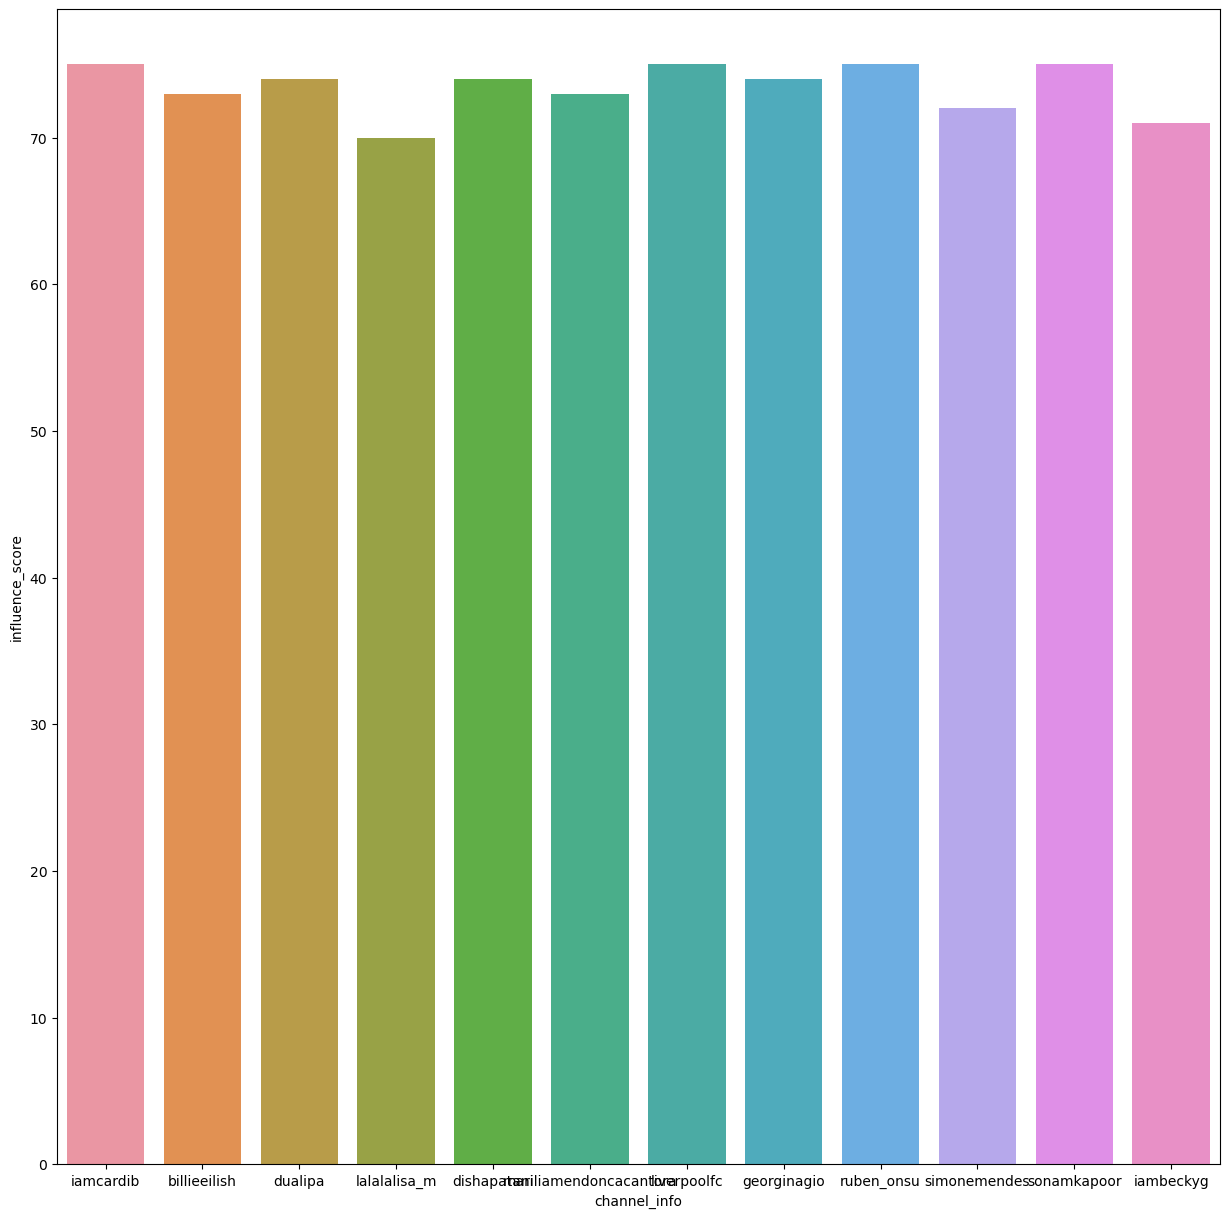

In [32]:
plt.figure(figsize=(15,15))
sns.barplot(x='channel_info',y='influence_score',data=insta)
plt.show()

above graph shows that instagramer influencer_score is between only 70 to 75

# 5]which country has max no of influencer using barplot

In [33]:
post1=df['influence_score'].max()
df[['country','influence_score']].loc[df['influence_score']==post1]


,country,influence_score
3,United States,93


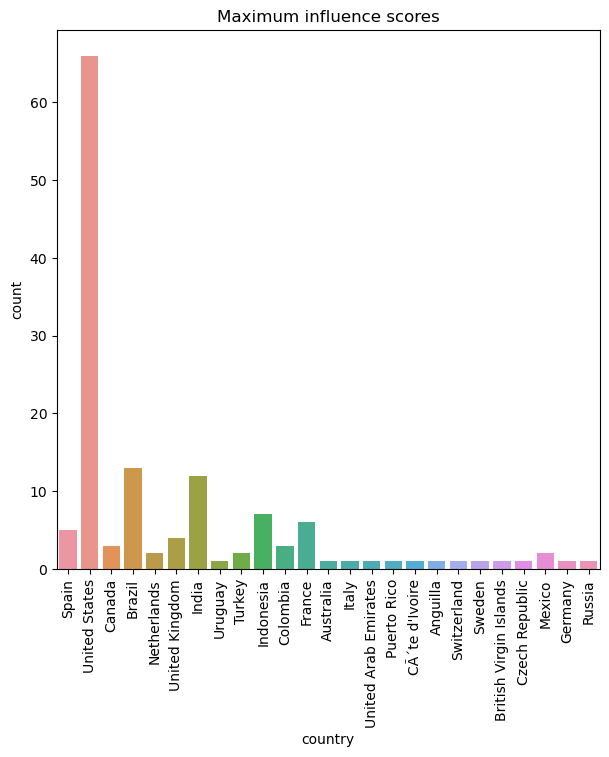

In [34]:
plt.figure(figsize=(7,7))
plt.title('Maximum influence scores')
sns.countplot(x='country',data=df)
plt.xticks(rotation=90)
plt.show()

above graph shows that who having maximum influencer_score is 93

# 6]maximum post done by the Top 5 influencer

In [35]:
toppost=df.nlargest(5,'posts')
toppost

,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
62,raffinagita1717,83,0.017090,63,0.377832,0.58,0.358008,6,Indonesia
123,natgeotravel,82,0.016504,45,0.185449,0.12,0.051562,3,United States
159,ruben_onsu,75,0.013086,38,0.136035,0.13,0.047949,1,Indonesia
47,nba,87,0.012598,70,0.362109,0.28,0.192285,4,United States
153,worldstar,78,0.011328,39,0.153711,0.23,0.082422,1,United States


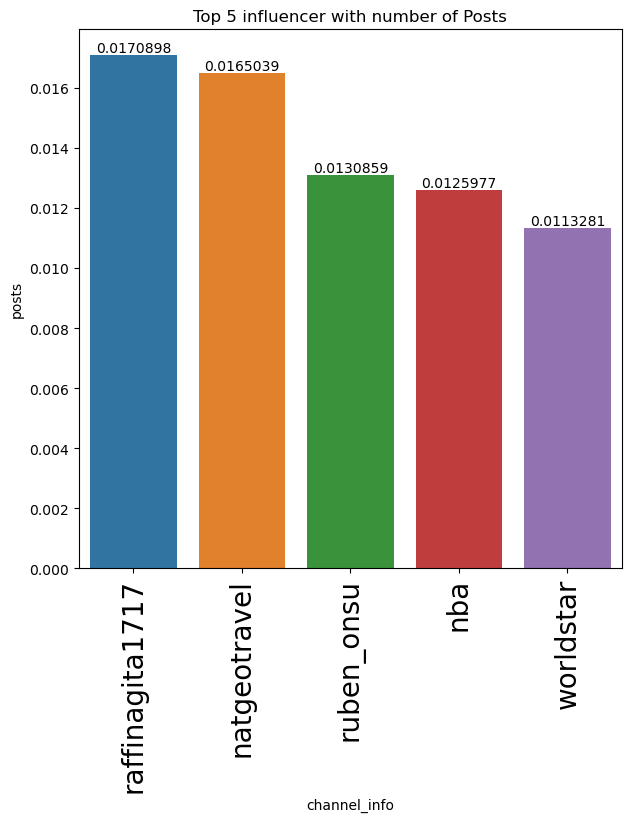

In [36]:
plt.figure(figsize=(7,7))
plt.title('Top 5 influencer with number of Posts')
ax=sns.barplot(data=toppost,x='channel_info',y='posts')
ax.bar_label(ax.containers[0])
plt.xticks(rotation='90',size='20')
plt.show()

above graph shows that who having top maximum post using bar graph

# 7]which influencer having got maximum like

In [37]:
toplikes=df.nlargest(5,'total_likes')
toplikes

,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
102,thv,83,0.000059,49,15.400000,25.80,12.600000,987,NaN
199,raisa6690,80,0.004102,32,0.226758,0.30,0.095117,969,Indonesia
148,addisonraee,85,0.000293,40,3.100000,2.49,0.971094,957,NaN
169,antogriezmann,83,0.000850,36,1.100000,0.57,0.198828,955,France
132,hrithikroshan,85,0.000566,43,1.600000,3.82,1.600000,949,CÃ´te d'Ivoire


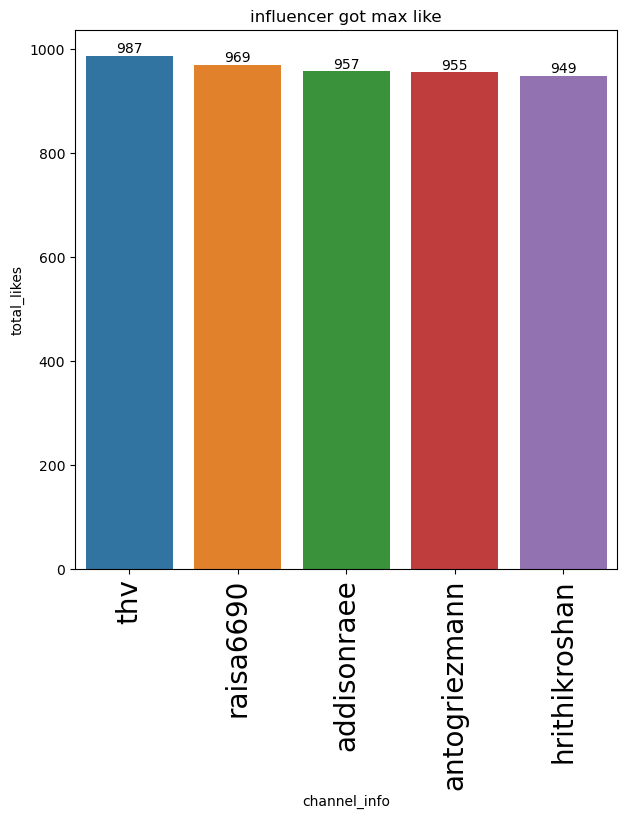

In [38]:
plt.figure(figsize=(7,7))
plt.title('influencer got max like')
ax=sns.barplot(data=toplikes,x='channel_info',y='total_likes')
ax.bar_label(ax.containers[0])
plt.xticks(rotation='90',size='20')
plt.show()

above graph shows that who having got top maximum like using bar graph

# 8]Creating new data frame which having minimum engage rate

In [39]:
r=df.nsmallest(5,'60_day_eng_rate')
r

,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
55,emmawatson,87,0.000332,67,1.900000,0.01,0.00000,639,United States
146,marinaruybarbosa,81,0.002051,40,0.572656,0.01,0.00000,1,Brazil
25,badgalriri,88,0.004687,135,3.700000,0.02,0.00000,17,United States
61,willsmith,82,0.001367,63,1.400000,0.02,0.00000,1,United States
134,buzzfeedtasty,85,0.008691,43,0.063574,0.02,0.00752,580,Spain


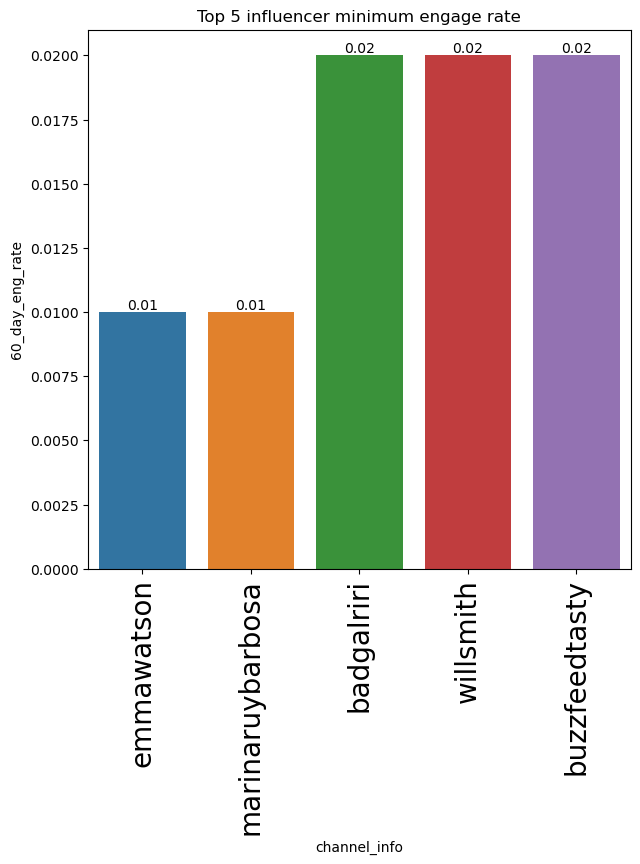

In [40]:
plt.figure(figsize=(7,7))
plt.title('Top 5 influencer minimum engage rate')
ax=sns.barplot(data=r,x='channel_info',y='60_day_eng_rate')
ax.bar_label(ax.containers[0])
plt.xticks(rotation='90',size='20')
plt.show()

above graph shows that who influencer having minimum engage rate on instagram,here have least 5 influencer having min enange rate

# 9]creating a dataframe which having munimum post

In [41]:
min_post=df[['channel_info','posts','influence_score','followers']].sort_values(by='posts',ascending=False)[:5]
min_post

,channel_info,posts,influence_score,followers
62,raffinagita1717,0.017090,83,63
123,natgeotravel,0.016504,82,45
159,ruben_onsu,0.013086,75,38
47,nba,0.012598,87,70
153,worldstar,0.011328,78,39


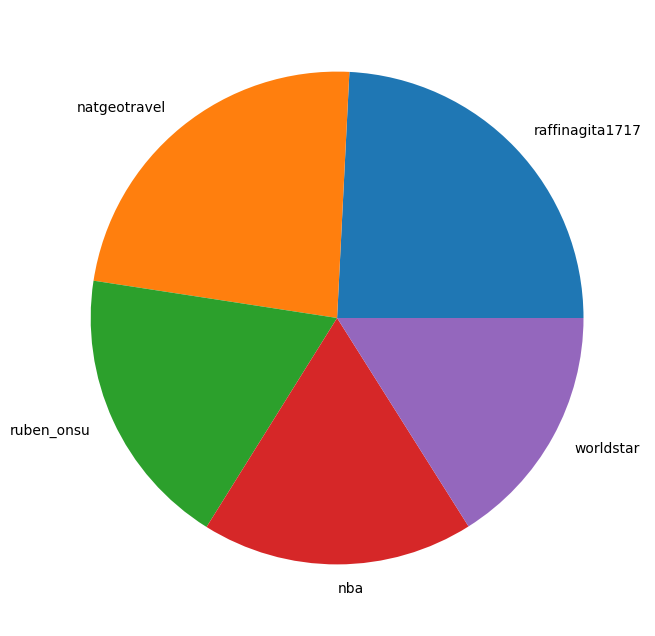

In [42]:
plt.figure(figsize=(10,8))
plt.pie(x='posts',data=min_post,labels=min_post.channel_info)
plt.show()

in above graph represent the which influencer having minimum post,here i used pie graph

# 10]creating a dataframe which having minimum followers

In [43]:
min_foll=df[['channel_info','followers']].sort_values(by='followers',ascending=True)[:10]
min_foll

,channel_info,followers
199,raisa6690,32
190,bmw,33
191,danbilzerian,33
192,khabib_nurmagomedov,33
193,zidane,33
198,nickjonas,33
195,iambeckyg,33
197,luansantana,33
194,sonamkapoor,33
196,nancyajram,33


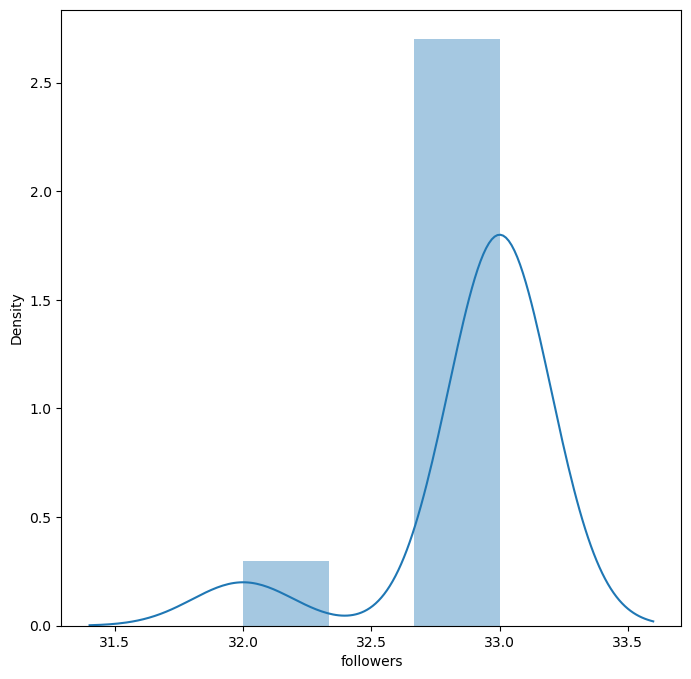

In [44]:
plt.figure(figsize=(8,8))
sns.distplot(min_foll['followers'])
plt.show()

above graph shows skewness of who got minimum followers,here the negative skewness

In [47]:
df.describe()

,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
count,200.000000,200.000000,200.000000,200.000000,199.000000,200.000000,200.000000
mean,81.820000,0.003418,76.930000,1.781933,1.902010,1.202598,141.660000
std,8.878159,0.003394,73.714955,2.196127,3.329719,1.860260,276.169117
min,22.000000,0.000010,32.000000,0.063574,0.010000,0.000000,1.000000
25%,80.000000,0.000925,40.000000,0.492578,0.410000,0.191162,2.000000
50%,84.000000,0.002051,49.500000,1.100000,0.880000,0.519678,3.500000
75%,86.000000,0.004907,68.000000,2.100000,2.035000,1.325000,20.250000
max,93.000000,0.017090,475.000000,15.400000,26.410000,12.600000,987.000000
